In [ ]:
!pip install matplotlib
!pip install seaborn

In [ ]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
cars = pd.read_csv('Automobile price data _Raw_.csv')

In [ ]:
cars

In [57]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    float64
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    int64  
 16  engine-size        201 non

In [ ]:
cars.isnull().sum()

In [ ]:
cars = cars.replace("?", py.nan)

In [ ]:
num_like = ["normalized-losses", "bore", "stroke", "horsepower", "peak-rpm", "price"]
for x in num_like:
    cars[x] = pd.to_numeric(cars[x])

In [ ]:
for x in ["normalized-losses","bore","stroke","horsepower","peak-rpm"]:
    if cars[x].isna().any():
        cars[x] = cars[x].fillna(cars[x].median())

In [ ]:
cars = cars.dropna(subset=["price"]).reset_index(drop=True)

In [42]:
cars

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
197,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
198,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
199,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [ ]:
cars.info()

In [ ]:
cars["num-of-doors"] = cars["num-of-doors"].fillna(cars["num-of-doors"].mode(dropna=True).iloc[0])

In [ ]:
cyl_map = {"two": 2, "three": 3, "four": 4, "five": 5, "six": 6, "eight": 8, "ten": 10, "twelve": 12}
cars["num-of-cylinders"] = cars["num-of-cylinders"].map(cyl_map)
cars["num-of-cylinders"] = pd.to_numeric(cars["num-of-cylinders"])

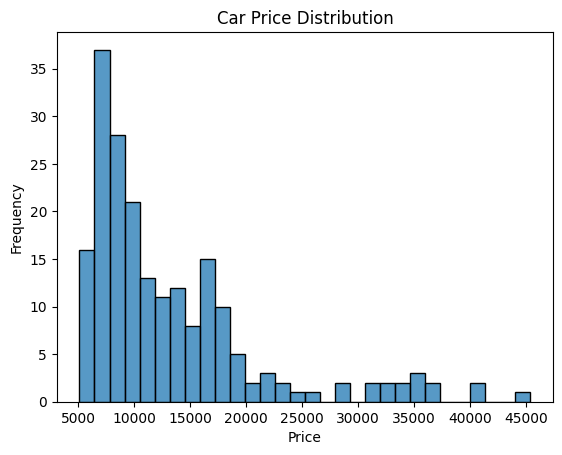

In [35]:
plt.figure()
sns.histplot(cars["price"], bins=30)
plt.title("Car Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

Text(0, 0.5, 'Price')

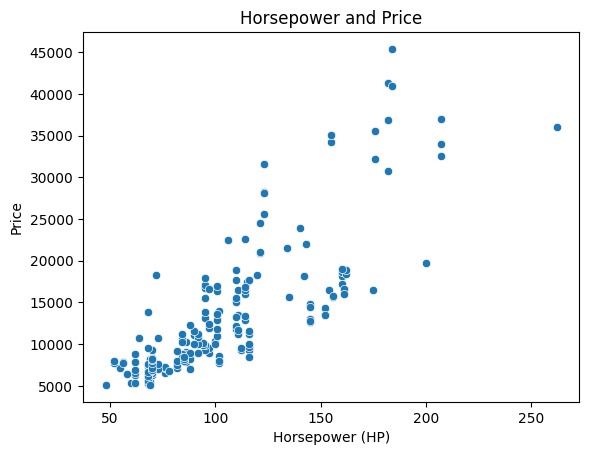

In [55]:
sns.scatterplot(x = cars["horsepower"], y = cars["price"])
plt.title("Horsepower and Price")
plt.xlabel("Horsepower (HP)")
plt.ylabel("Price")

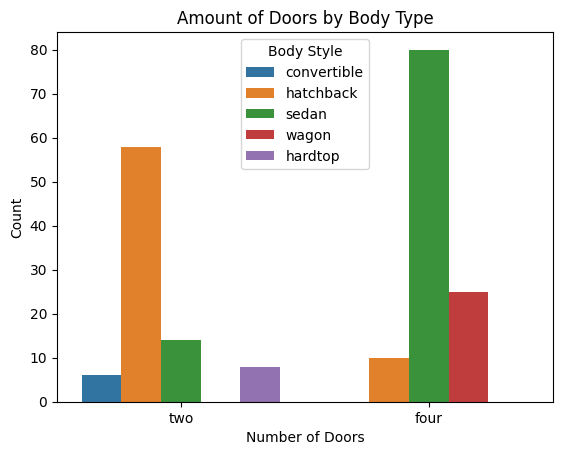

In [41]:
sns.countplot(x = cars["num-of-doors"], hue = cars["body-style"])
plt.title("Amount of Doors by Body Type")
plt.xlabel("Number of Doors")
plt.ylabel("Count")
plt.legend(title = "Body Style")

Text(0, 0.5, 'Highway MPG')

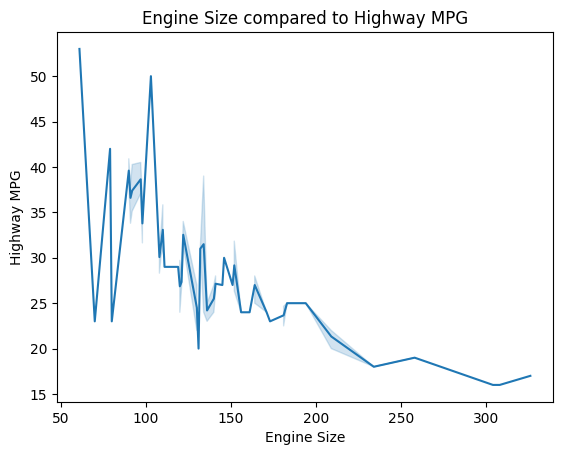

In [52]:
sns.lineplot(x = cars["engine-size"], y = cars["highway-mpg"])
plt.title("Engine Size compared to Highway MPG")
plt.xlabel("Engine Size")
plt.ylabel("Highway MPG")

Text(0, 0.5, 'Length')

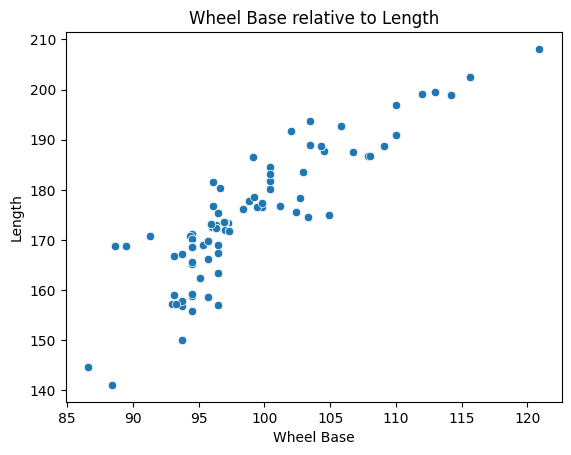

In [58]:
sns.scatterplot(x=cars["wheel-base"], y=cars["length"])
plt.title("Wheel Base relative to Length")
plt.xlabel("Wheel Base")
plt.ylabel("Length")